In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dt = pd.read_csv("C:\\Users\\DeLL\\Desktop\\eda_terrorism.csv",encoding="latin1")
df=pd.DataFrame(dt)
df.head()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\810461863.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv("C:\\Users\\DeLL\\Desktop\\eda_terrorism.csv",encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

cleaning the data


In [6]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   location         55495 non-null   object 
 10  summary          115562 non-null  object 
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [8]:
df.shape

(181691, 19)

In [9]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
location           126196
summary             66129
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
dtype: int64

In [10]:
df["nkill"]=df["nkill"].fillna(0)
df["nwound"]=df["nwound"].fillna(0)
df["Casualty"]=df["nkill"]+df["nwound"]

In [11]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### Visualising the data


  1. Number of Attacks in each Year

In [12]:
nattacks_yr=df["iyear"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"iyear","iyear":"Attacks_yr"}).set_index("iyear")
nattacks_yr.head()

,Attacks_yr
iyear,
1970,651
1971,471
1972,568
1973,473
1974,581


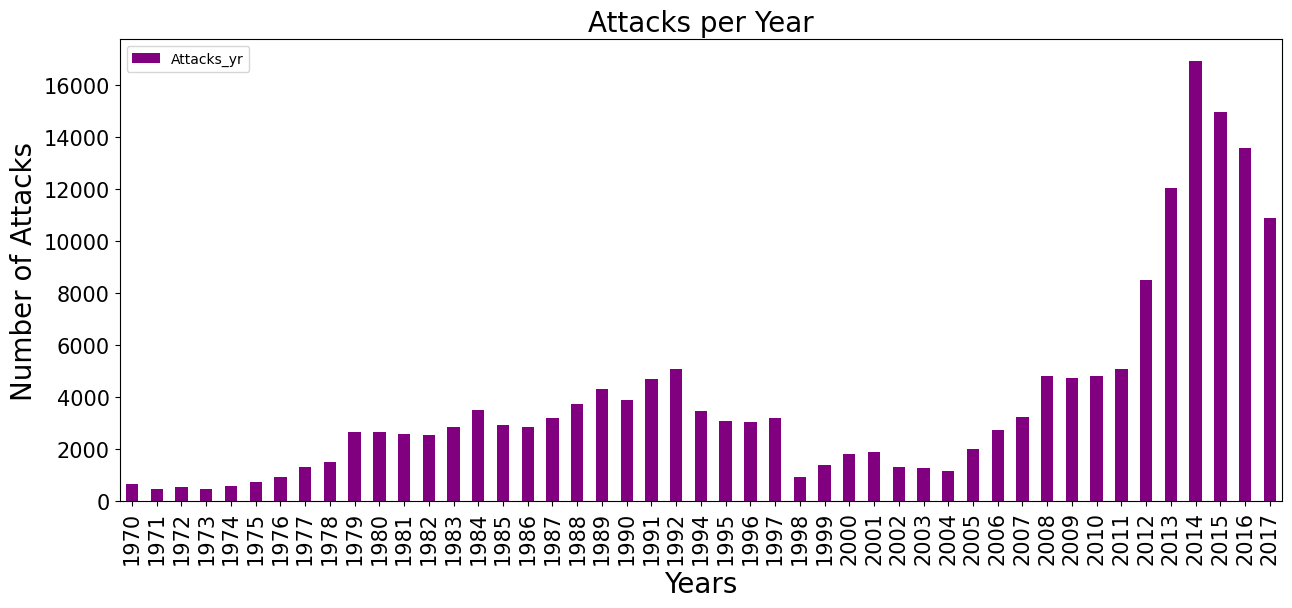

In [13]:
nattacks_yr.plot(kind="bar",color="purple",figsize=(15,6),fontsize=15)
plt.title("Attacks per Year",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

(i). Most number of attacks(16903) in 2014

(ii). Least number of attacks(471) in 1971

2. Total Casualties (Killed + Wounded) in each Year

In [14]:
at=df[["iyear","Casualty"]].groupby("iyear").sum()
at.head()

,Casualty
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


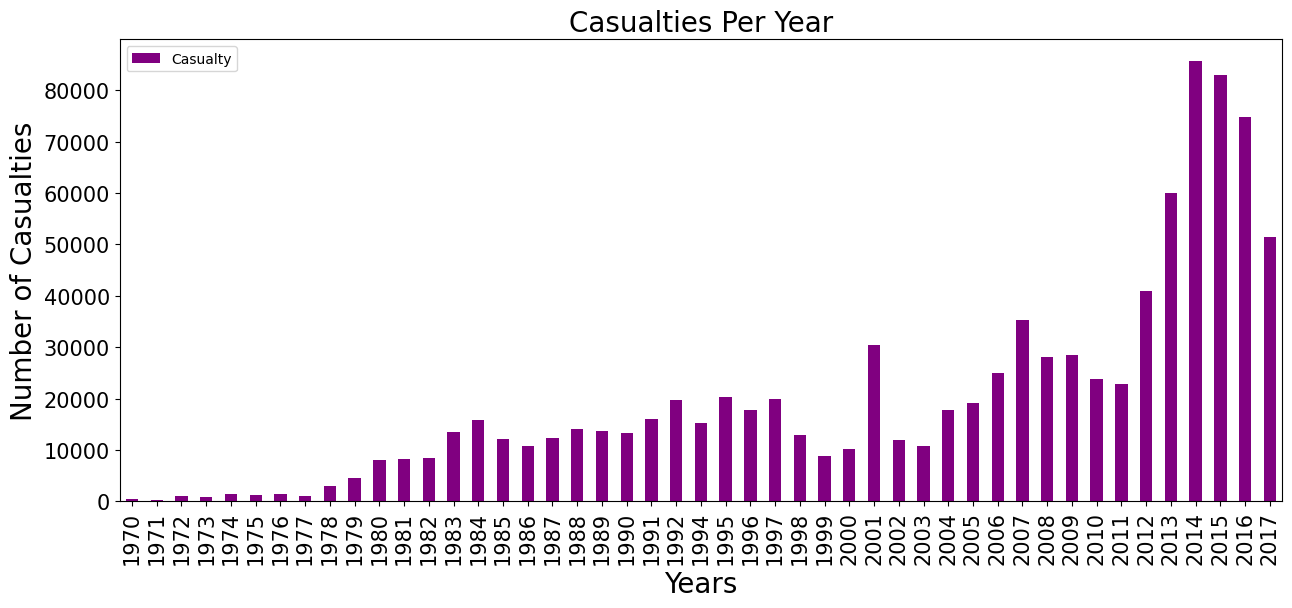

In [15]:
at.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Casualties Per Year",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=20)
plt.show()

3. Killed in each Year

In [16]:
k_yr=df[["iyear","nkill"]].groupby("iyear").sum()
k_yr.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [17]:
w_yr=df[["iyear","nwound"]].groupby("iyear").sum()
w_yr.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1318627352.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=13)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1318627352.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=13)


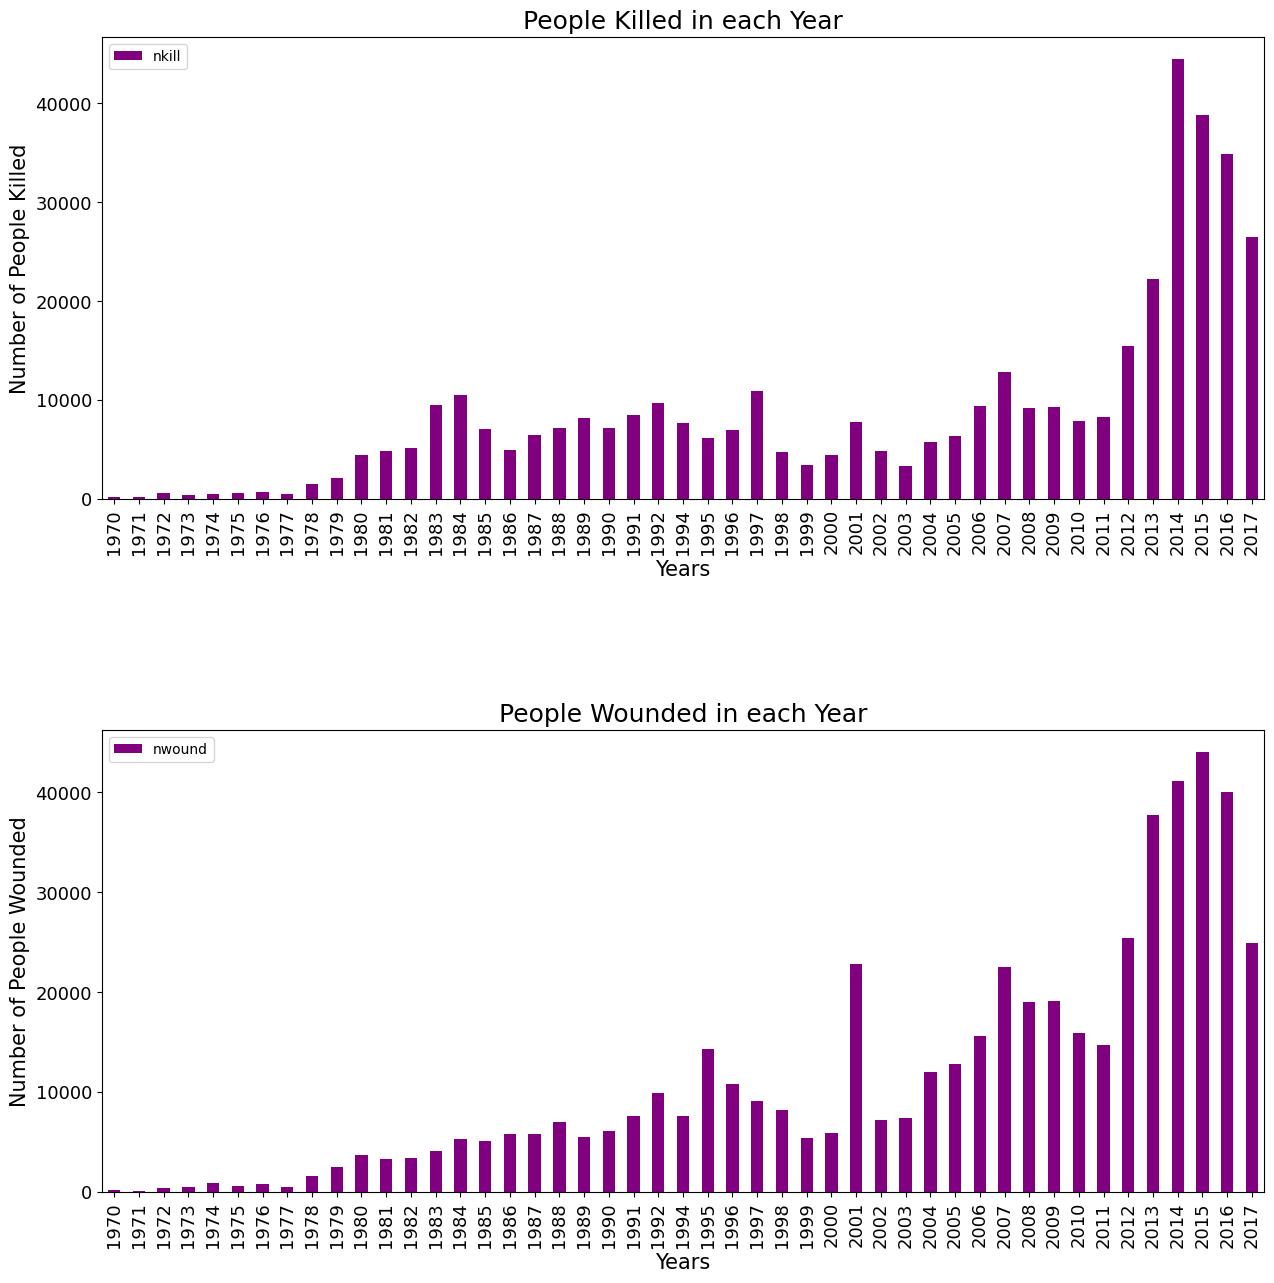

In [18]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k_yr.plot(kind="bar",color="purple",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year",fontsize=18)
ax0.set_xlabel("Years",fontsize=15)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=13)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=13)
ax0.set_ylabel("Number of People Killed",fontsize=15) 

#Wounded
w_yr.plot(kind="bar",color="purple",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year",fontsize=18)
ax1.set_xlabel("Years",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=13)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=13)

fig.subplots_adjust(hspace=0.5)

plt.show()

Region wise attacks

In [19]:
regi = pd.crosstab(df.iyear,df.region_txt)
regi.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


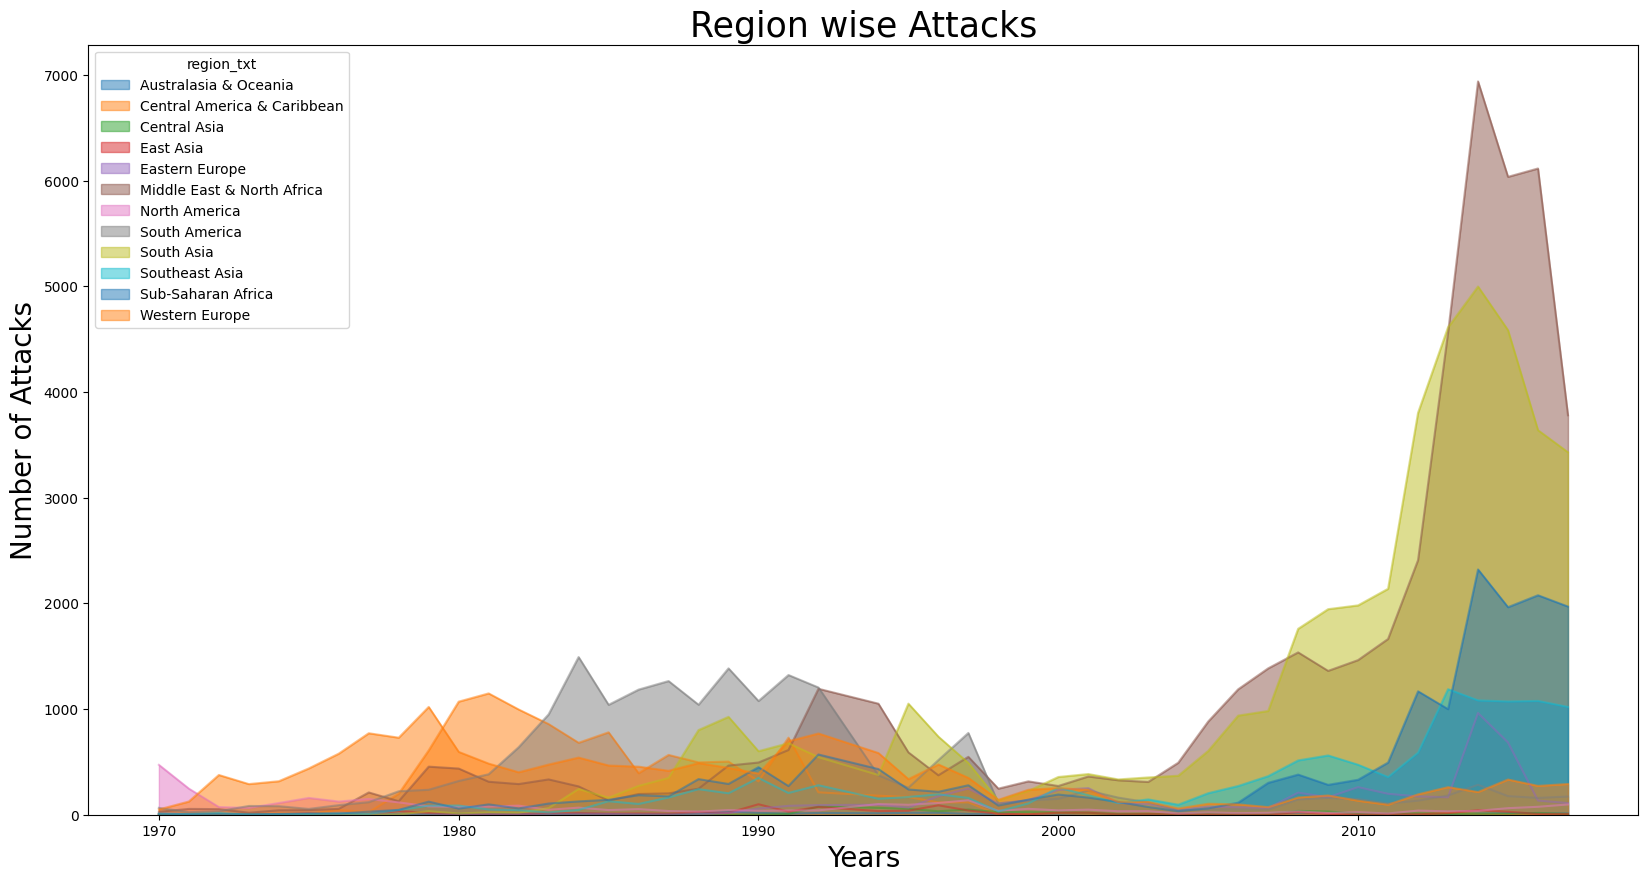

In [20]:
regi.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise Attacks",fontsize=25)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [21]:
reg=regi.transpose()
reg["Total"]=reg.sum(axis=1)
ra=reg["Total"].sort_values(ascending=True)
ra

region_txt
Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: Total, dtype: int64

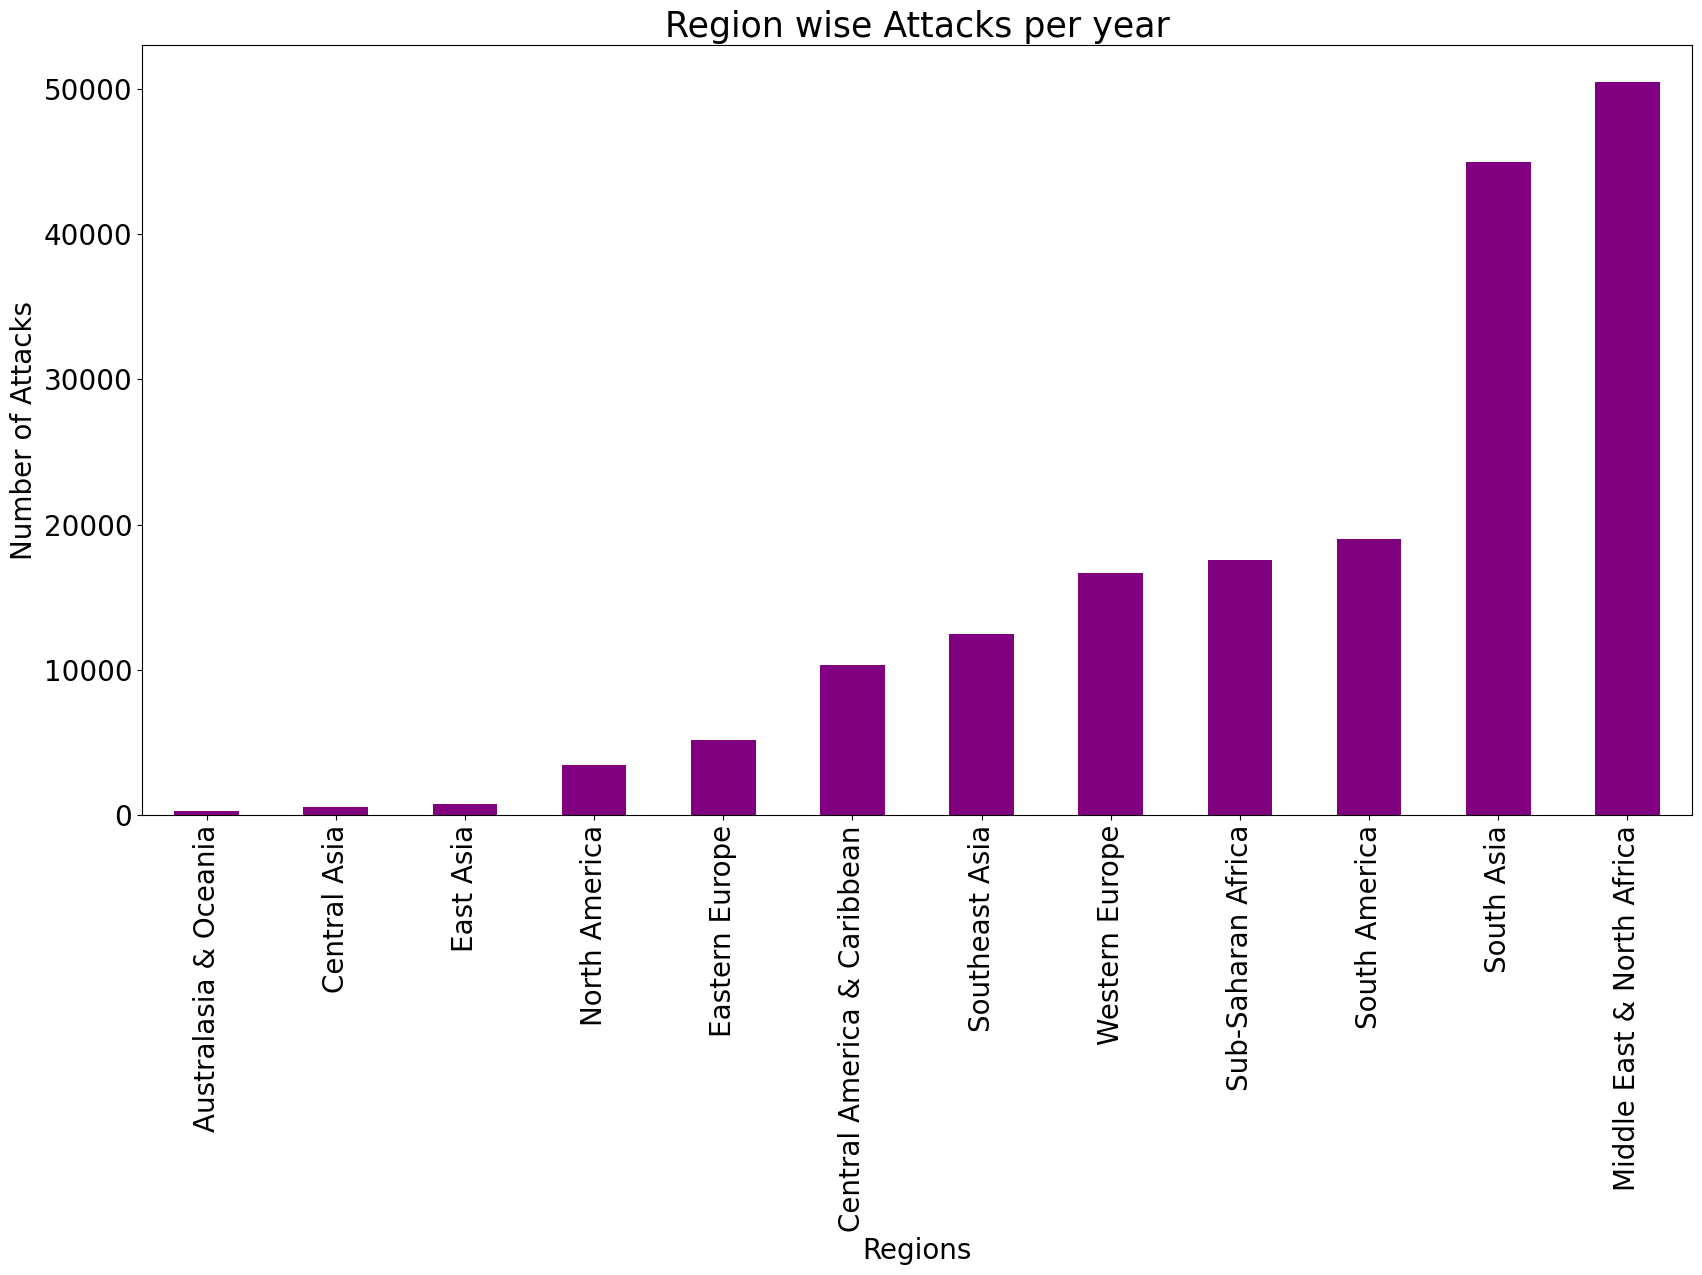

In [22]:
ra.plot(kind="bar",color='purple',figsize=(20,10))
plt.title("Region wise Attacks per year",fontsize=25)
plt.xlabel("Regions",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

Now again the Casulaties for a particular region

In [23]:
reg_cas=df[['region_txt','Casualty']].groupby('region_txt').sum().sort_values(by='Casualty',ascending=True)

In [24]:
reg_cas

,Casualty
region_txt,
Australasia & Oceania,410.0
Central Asia,3009.0
East Asia,10365.0
Eastern Europe,19460.0
Western Europe,25026.0
North America,26447.0
Central America & Caribbean,37699.0
Southeast Asia,41896.0
South America,45553.0


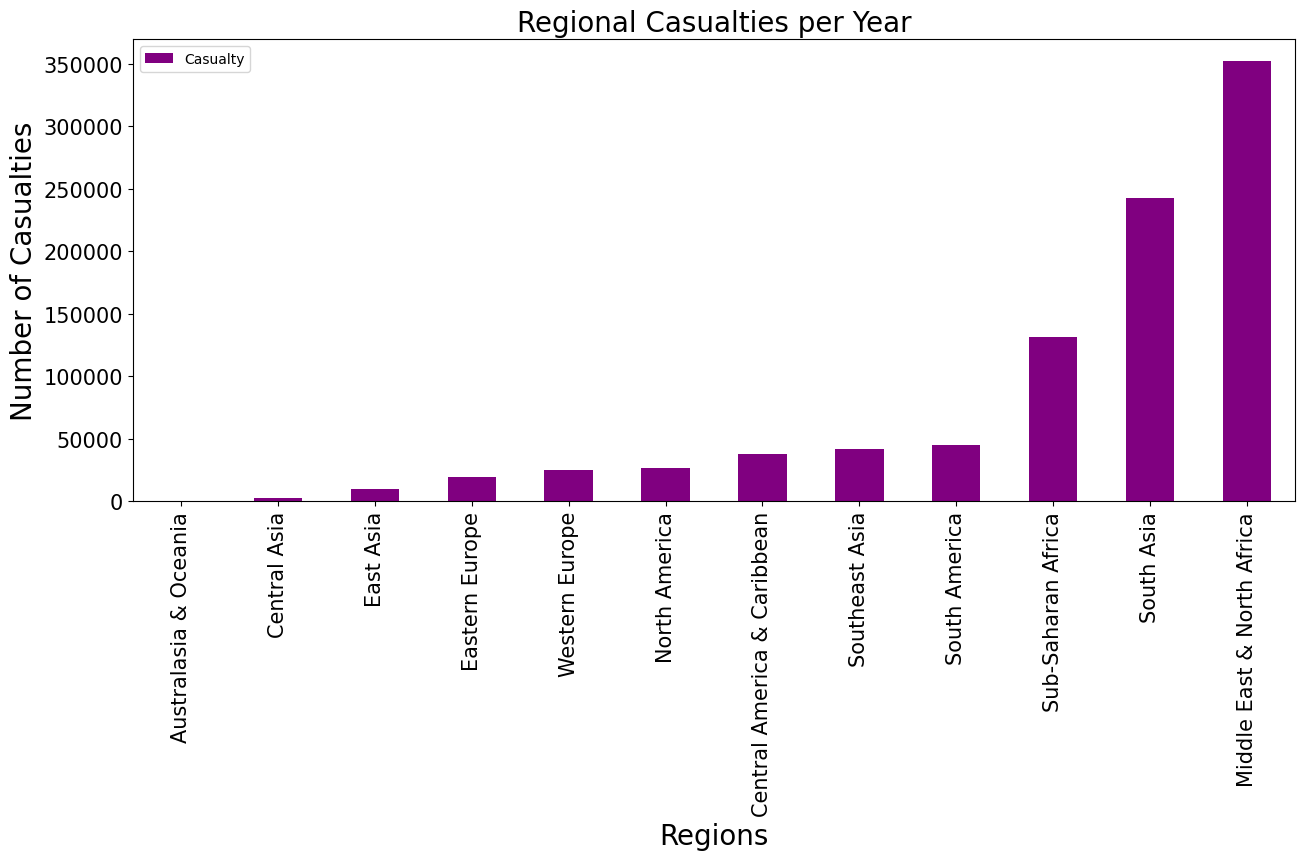

In [25]:
reg_cas.plot(kind="bar",color="purple",figsize=(15,6),fontsize=15)
plt.title("Regional Casualties per Year",fontsize=20)
plt.xlabel("Regions",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=20)
plt.show()

In [26]:
reg_kill=df[['region_txt','nkill']].groupby('region_txt').sum().sort_values(by='nkill',ascending=True)

In [27]:
reg_woun=df[['region_txt','nwound']].groupby('region_txt').sum().sort_values(by='nwound',ascending=True)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\218798678.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=13)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\218798678.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=13)


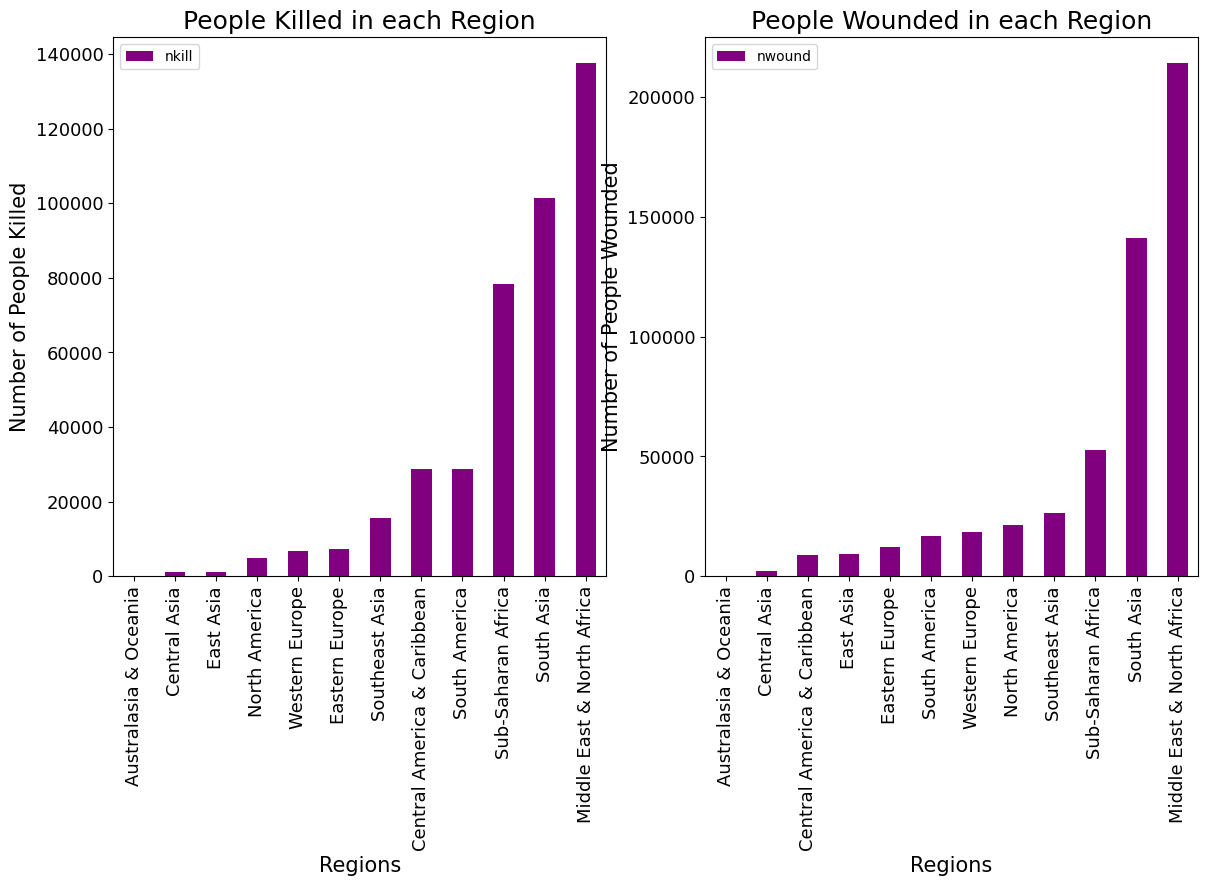

In [28]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
reg_kill.plot(kind="bar",color="purple",figsize=(14,7),ax=ax0)
ax0.set_title("People Killed in each Region",fontsize=18)
ax0.set_xlabel("Regions",fontsize=15)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=13)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=13)
ax0.set_ylabel("Number of People Killed",fontsize=15) 

#Wounded
reg_woun.plot(kind="bar",color="purple",figsize=(14,7),ax=ax1)
ax1.set_title("People Wounded in each Region",fontsize=18)
ax1.set_xlabel("Regions",fontsize=15)
ax1.set_ylabel("Number of People Wounded",fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=13)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=13)

fig.subplots_adjust(hspace=0.5)

plt.show()

City wise attacks

In [29]:
ct = df['city'].value_counts()[1:11]
ct

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

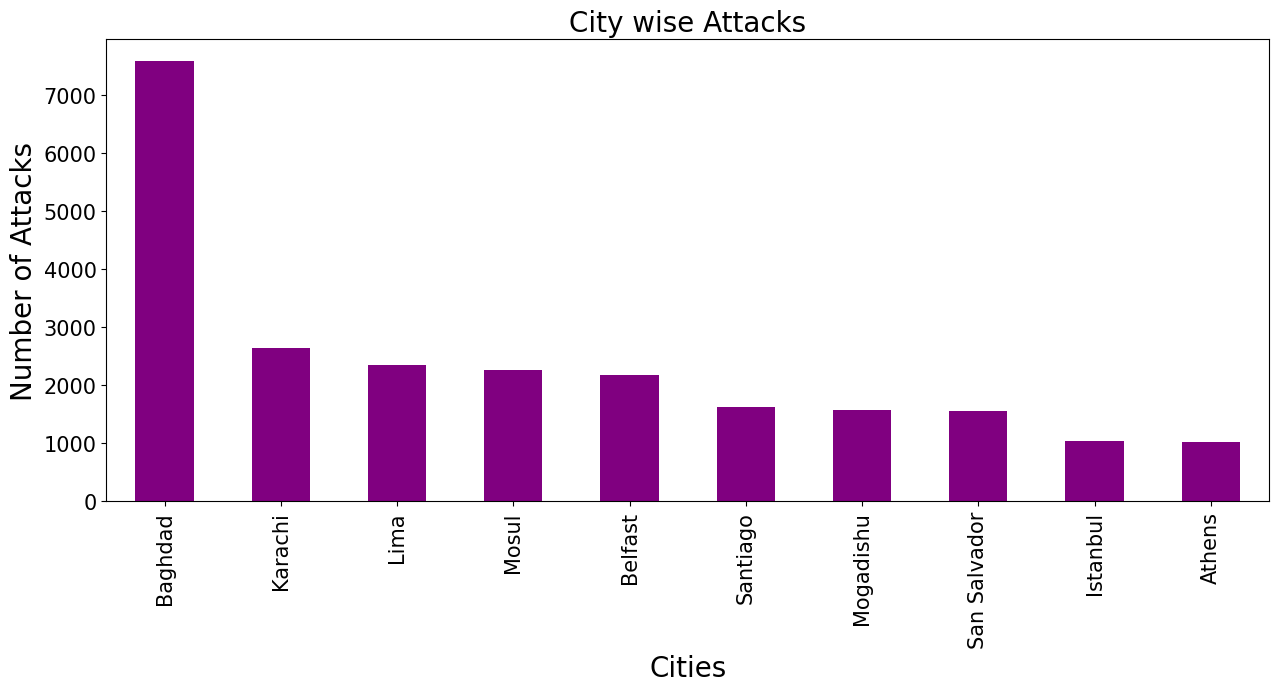

In [30]:
ct.plot(kind="bar",color="purple",figsize=(15,6),fontsize=15)
plt.title("City wise Attacks",fontsize=20)
plt.xlabel("Cities",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [40]:
ck=df[['city','nkill']].groupby('city').sum().sort_values(by='nkill',ascending=False)

In [41]:
cw=df[['city','nwound']].groupby('city').sum().sort_values(by='nwound',ascending=False)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1325473271.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1325473271.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)


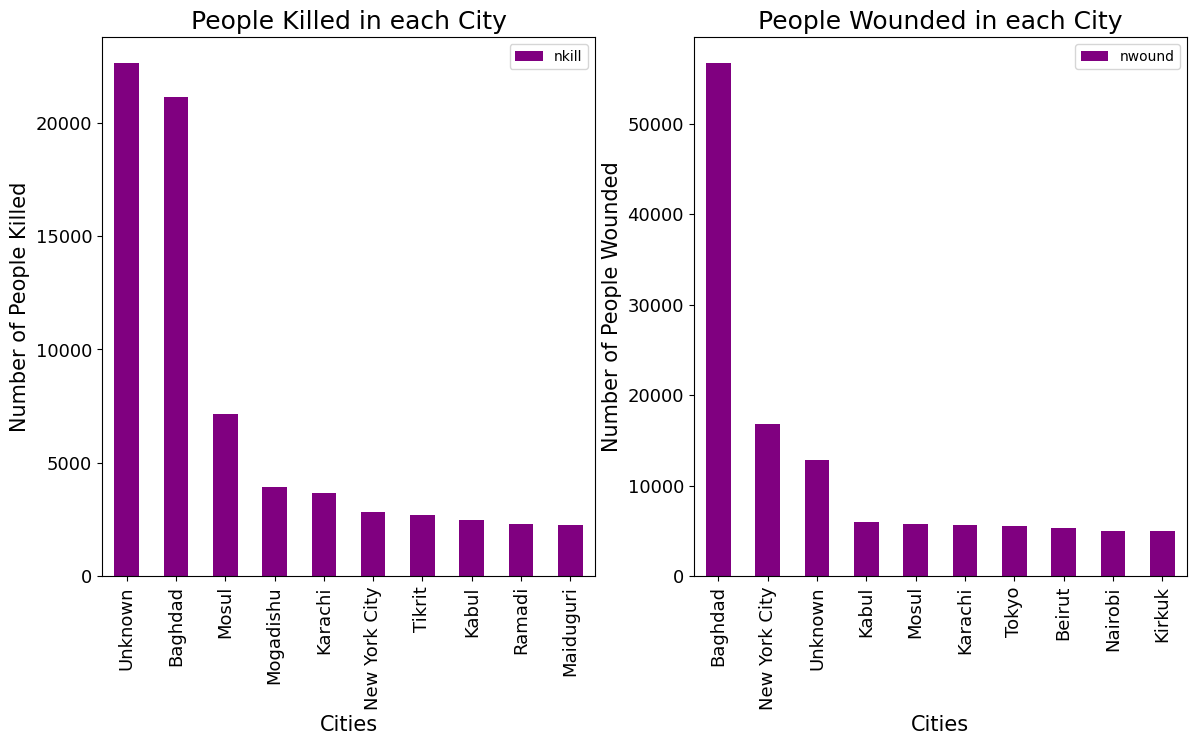

In [42]:
fig=plt.figure()
kill=fig.add_subplot(1,2,1)
wound=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="purple",figsize=(14,7),ax=kill)
kill.set_title("People Killed in each City",fontsize=18)
kill.set_xlabel("Cities",fontsize=15)
kill.set_xticklabels(kill.get_xticklabels(), fontsize=13)
kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
kill.set_ylabel("Number of People Killed",fontsize=15) 

#Wounded
cw[:10].plot(kind="bar",color="purple",figsize=(14,7),ax=wound)
wound.set_title("People Wounded in each City",fontsize=18)
wound.set_xlabel("Cities",fontsize=15)
wound.set_ylabel("Number of People Wounded",fontsize=15)
wound.set_xticklabels(wound.get_xticklabels(), fontsize=13)
wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)

fig.subplots_adjust(hspace=0.5)

plt.show()

Country Wise Attacks

In [35]:
cnt = df['country_txt'].value_counts()[1:11]
cnt

Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Name: country_txt, dtype: int64

In [43]:
cnk=df[['country_txt','nkill']].groupby('country_txt').sum().sort_values(by='nkill',ascending=False)

In [44]:
cnw=df[['country_txt','nwound']].groupby('country_txt').sum().sort_values(by='nwound',ascending=False)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\3912650421.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\3912650421.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)


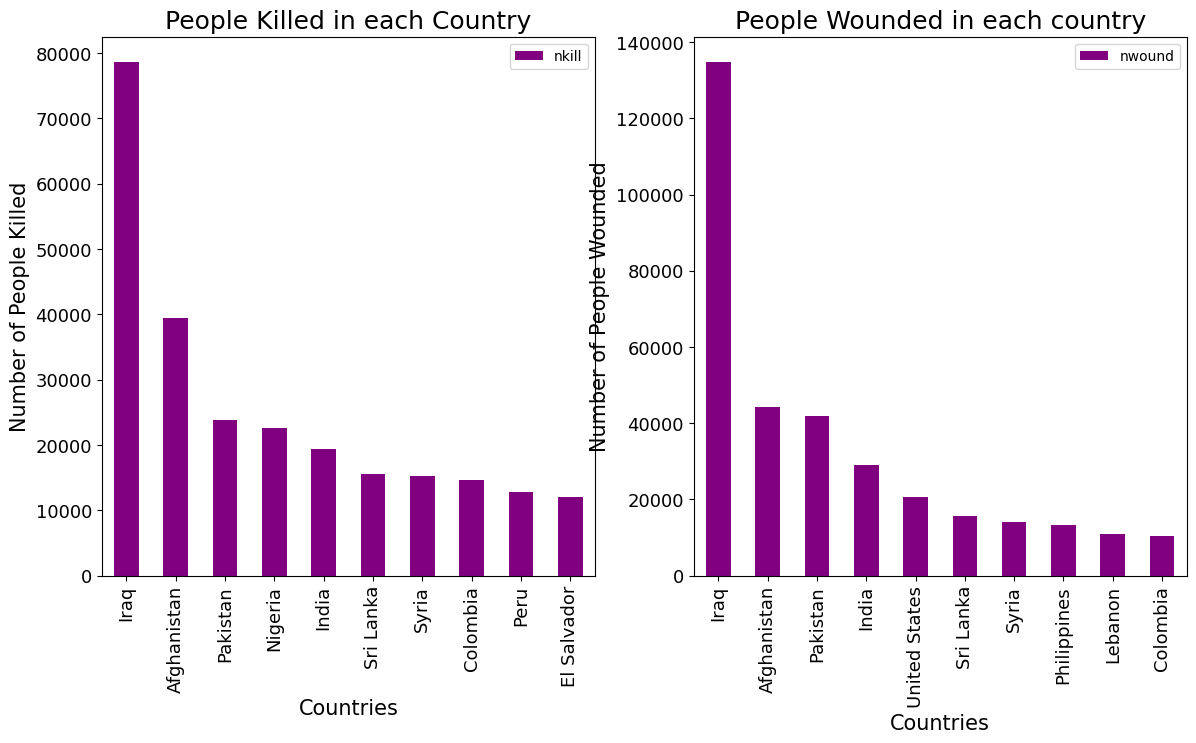

In [53]:
fig=plt.figure()
kill=fig.add_subplot(1,2,1)
wound=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="purple",figsize=(14,7),ax=kill)
kill.set_title("People Killed in each Country",fontsize=18)
kill.set_xlabel("Countries",fontsize=15)
kill.set_xticklabels(kill.get_xticklabels(), fontsize=13)
kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
kill.set_ylabel("Number of People Killed",fontsize=15) 

#Wounded
cnw[:10].plot(kind="bar",color="purple",figsize=(14,7),ax=wound)
wound.set_title("People Wounded in each country",fontsize=18)
wound.set_xlabel("Countries",fontsize=15)
wound.set_ylabel("Number of People Wounded",fontsize=15)
wound.set_xticklabels(wound.get_xticklabels(), fontsize=13)
wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)

fig.subplots_adjust(hspace=0.5)

plt.show()

### Till now we have analysed the attacks in a particular fields.. like year wise, country specific,city and region specific as well.

 We have plotted the graph for killed and wounded persons due to the terrorist attacks in the above mentioned specific feilds

now we will analyse the dataset for the type of attacks that leads to terrorism 

In [46]:
Att_typ=df["attacktype1_txt"].value_counts()
Att_typ

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

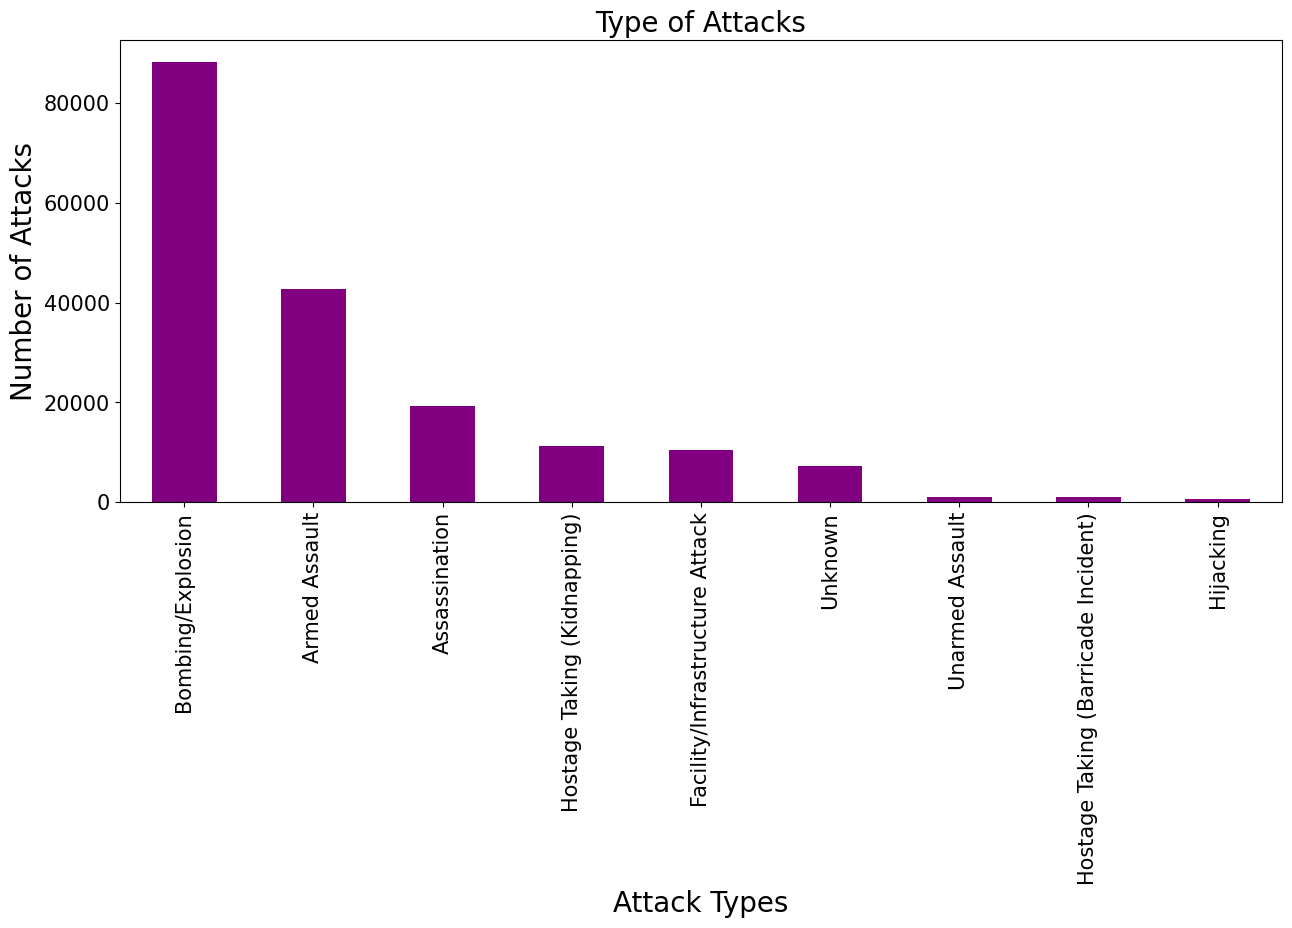

In [47]:
Att_typ.plot(kind="bar",color="purple",figsize=(15,6),fontsize=15)
plt.title("Type of Attacks",fontsize=20)
plt.xlabel("Attack Types",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [48]:
ak=df[['attacktype1_txt','nkill']].groupby('attacktype1_txt').sum().sort_values(by='nkill',ascending=False)

In [50]:
aw=df[['attacktype1_txt','nwound']].groupby('attacktype1_txt').sum().sort_values(by='nwound',ascending=False)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1810960209.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_7016\1810960209.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)


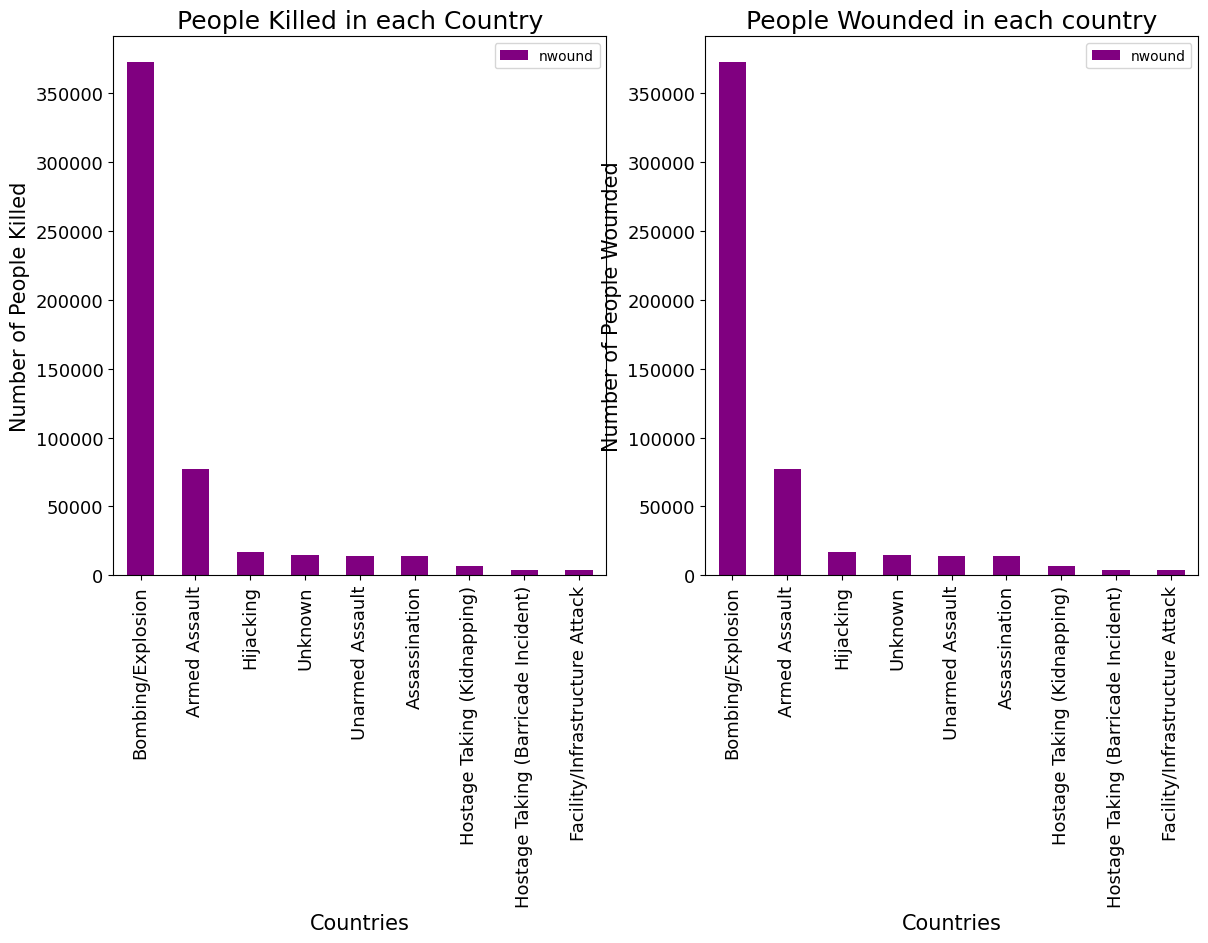

In [52]:
fig=plt.figure()
kill=fig.add_subplot(1,2,1)
wound=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="purple",figsize=(14,7),ax=kill)
kill.set_title("People Killed in each Country",fontsize=18)
kill.set_xlabel("Countries",fontsize=15)
kill.set_xticklabels(kill.get_xticklabels(), fontsize=13)
kill.set_yticklabels(kill.get_yticklabels(), fontsize=13)
kill.set_ylabel("Number of People Killed",fontsize=15) 

#Wounded
aw.plot(kind="bar",color="purple",figsize=(14,7),ax=wound)
wound.set_title("People Wounded in each country",fontsize=18)
wound.set_xlabel("Countries",fontsize=15)
wound.set_ylabel("Number of People Wounded",fontsize=15)
wound.set_xticklabels(wound.get_xticklabels(), fontsize=13)
wound.set_yticklabels(wound.get_yticklabels(), fontsize=13)

fig.subplots_adjust(hspace=0.5)

plt.show()

In [55]:
killed=df.loc[:,"nkill"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",killed)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


In [58]:
wounded=df.loc[:,"nwound"].sum()
print("Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",wounded)

Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


In [59]:
casualties=df.loc[:,"Casualty"].sum()
print("Total number of people casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualties)

Total number of people casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0
